<a href="https://colab.research.google.com/github/simply-pouria/The-LMs-Book/blob/main/TheLMBook_Chapter1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 1


### Linear Regrerssion, Visualizing the MSE function



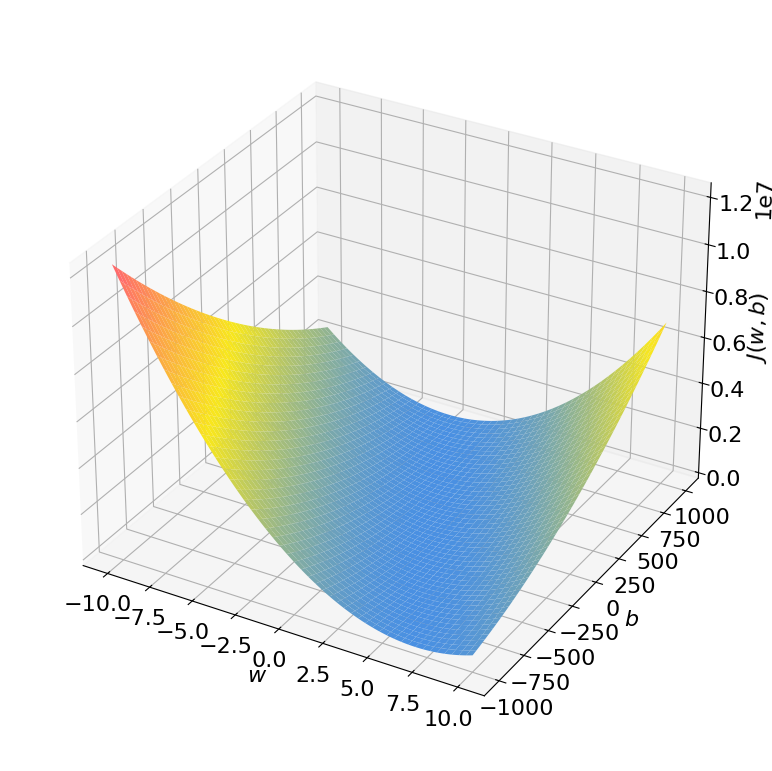

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors

# Define the quadratic loss function J(w, b)
# This function calculates the mean squared error for three data points:
# (150, 200), (200, 600), and (260, 500)
def calculate_loss(w, b):
    return (
        ((150*w + b - 200)**2 +
         (200*w + b - 600)**2 +
         (260*w + b - 500)**2) / 3
    )

# Set up the plot parameters
plt.rcParams['font.size'] = 16

# Generate parameter space for w and b
w_values = np.linspace(-10, 10, 400)
b_values = np.linspace(-1000, 1000, 400)
W, B = np.meshgrid(w_values, b_values)
Z = calculate_loss(W, B)

# Create custom colormap
colors_palette = [
    '#4a90e2',   # Blue
    '#f8e71c',   # Yellow
    '#ff6b6b'    # Coral/Red
]
custom_cmap = colors.LinearSegmentedColormap.from_list('custom', colors_palette)

# Create and setup the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(W, B, Z, cmap=custom_cmap)

# Set labels and adjust plot appearance
ax.set_xlabel('$w$', fontsize=16)
ax.set_ylabel('$b$', fontsize=16)
ax.set_zlabel('$J(w,b)$', fontsize=16)
ax.set_box_aspect(aspect=None, zoom=0.95)

# Adjust layout and display plot
plt.tight_layout()
plt.show()

### A Simple Neural Network Implementation
to Demonstrate Gradient Descent and Automatic differentiation   

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim


inputs = torch.tensor([
 [22, 25], [25, 35], [47, 80], [52, 95], [46, 82], [56, 90
],
 [23, 27], [30, 50], [40, 60], [39, 57], [53, 95], [48, 88
]
], dtype=torch.float32)

labels = torch.tensor([
 [0], [0], [1], [1], [1], [1], [0], [1], [1], [0], [1], [1
]
], dtype=torch.float32)

model = nn.Sequential(
 nn.Linear(inputs.shape[1], 1),
 nn.Sigmoid()
)

optimizer = optim.SGD(model.parameters(), lr=0.001)
criterion = nn.BCELoss() # binary cross-entropy loss

for step in range(500):
  optimizer.zero_grad()
  loss = criterion(model(inputs), labels)
  loss.backward()
  optimizer.step()